<a href="https://colab.research.google.com/github/Jumin304/ai-cham-cham-cham-game/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
titanic_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_test.csv')

print(titanic.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0    

In [220]:
#데이터전처리

In [221]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic_test['Sex'] = titanic_test['Sex'].map({'male': 0, 'female': 1})

print(titanic[['Name', 'Sex']].head())

                                                Name  Sex
0                            Braund, Mr. Owen Harris    0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1
2                             Heikkinen, Miss. Laina    1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1
4                           Allen, Mr. William Henry    0


In [222]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())

titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].mean())

In [223]:
data = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()
target = titanic['Survived'].to_numpy()

test_input = titanic_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()

print(data.shape)
print(target.shape)
print(test_input.shape)

(891, 6)
(891,)
(418, 6)


In [224]:
#로지스틱회귀

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, val_input, train_target, val_target = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
val_scaled = ss.transform(val_input)
test_scaled = ss.transform(test_input)

print(train_input.shape)
print(val_input.shape)

(712, 6)
(179, 6)


In [226]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(val_scaled, val_target))

0.7963483146067416
0.8100558659217877


In [227]:
params = [0.01, 0.1, 1, 10, 20, 50, 100]

for c in params:
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(train_scaled, train_target)

    train_score = lr.score(train_scaled, train_target)
    val_score = lr.score(val_scaled, val_target)

    print(train_score, val_score)

0.8089887640449438 0.7877094972067039
0.7991573033707865 0.7988826815642458
0.7963483146067416 0.8100558659217877
0.7935393258426966 0.8100558659217877
0.7935393258426966 0.8156424581005587
0.7935393258426966 0.8156424581005587
0.7935393258426966 0.8156424581005587


In [228]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

predictions_lr = lr.predict(test_scaled)

submission_lr = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': predictions_lr})
submission_lr.to_csv('submission_lr.csv', index=False)

print(submission_lr.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [229]:
unique, counts = np.unique(predictions_lr, return_counts=True)
result_count = dict(zip(unique, counts))
print(result_count)

survival_rate = result_count[1] / sum(counts) * 100
print(survival_rate)

{np.int64(0): np.int64(263), np.int64(1): np.int64(155)}
37.08133971291866


In [230]:
print(lr.coef_, lr.intercept_)

[[-0.91129577  1.31519511 -0.5171788  -0.29557607 -0.09982145  0.14093368]] [-0.65389921]


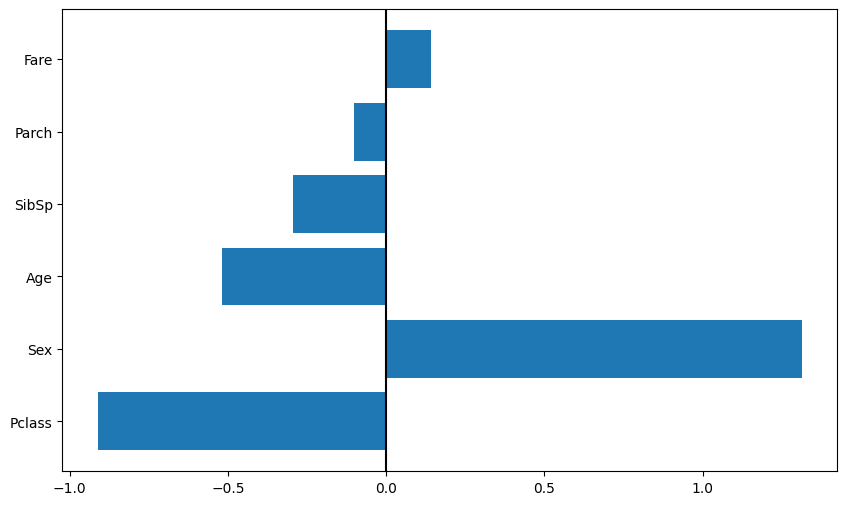

In [231]:
import matplotlib.pyplot as plt

feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
coefficients = lr.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.axvline(x=0, color='black')
plt.show()

In [232]:
#랜덤포레스트

In [233]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf.fit(train_scaled, train_target)

print(rf.score(train_scaled, train_target))
print(rf.score(val_scaled, val_target))

0.9831460674157303
0.8156424581005587


In [234]:
params = [3, 5, 7, 9, 11, 13, 15]

for max_depth in params:
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(train_scaled, train_target)

    train_score = rf.score(train_scaled, train_target)
    val_score = rf.score(val_scaled, val_target)

    print(train_score, val_score)

0.8300561797752809 0.8044692737430168
0.8637640449438202 0.7932960893854749
0.9044943820224719 0.8044692737430168
0.9396067415730337 0.8100558659217877
0.9564606741573034 0.8156424581005587
0.9634831460674157 0.8100558659217877
0.976123595505618 0.8156424581005587


In [235]:
rf = RandomForestClassifier(n_estimators=100, max_depth=11, n_jobs=-1, random_state=42)
rf.fit(train_scaled, train_target)

predictions_rf = rf.predict(test_scaled)

submission_rf = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': predictions_rf})
submission_rf.to_csv('submission_rf.csv', index=False)

print(submission_rf.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [236]:
unique, counts = np.unique(predictions_rf, return_counts=True)
result_count = dict(zip(unique, counts))
print(result_count)

survival_rate = result_count[1] / sum(counts) * 100
print(survival_rate)

{np.int64(0): np.int64(288), np.int64(1): np.int64(130)}
31.100478468899524


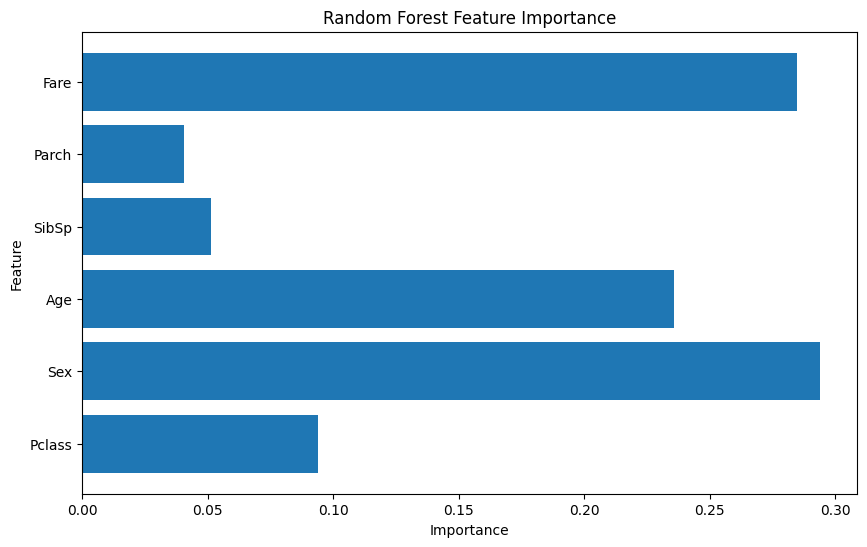

In [237]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

importances = rf.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()